Мохляков П.А. \
М8О-408Б-19 \
Вариант 3

## Лабораторная работа 2

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time

### Прогнозирование

In [10]:
def func(t: float):
    return np.sin(-2*t**2 + 7*t)

In [11]:
h = 0.001
t = (0, 5)
D = 5
ans_x = np.arange(t[0],t[1] + h, h)
ans = func(ans_x)

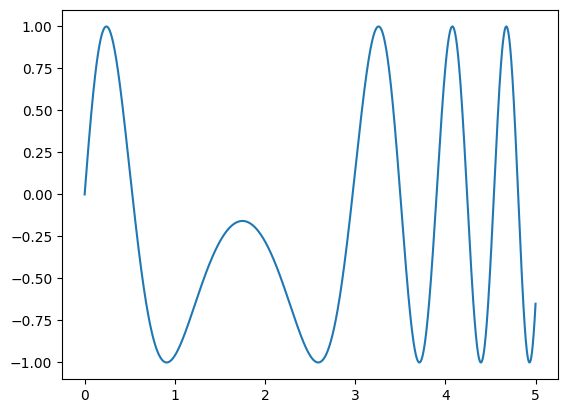

In [12]:
plt.plot(ans_x, ans)

Готовим датасет

In [13]:
X = [ans[i:i+D].tolist() for i in range(0, len(ans) - D)]
y = [ans[i] for i in range(D, len(ans))]

Создаем модель

In [14]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
predictor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pred (Dense)                (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Компилируем модель

In [15]:
opt = keras.optimizers.SGD(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

Тренеруем модель

Fit time: 15.70s
Result MSE: 0.0001645751908654347
Result MAE: 0.010006273165345192


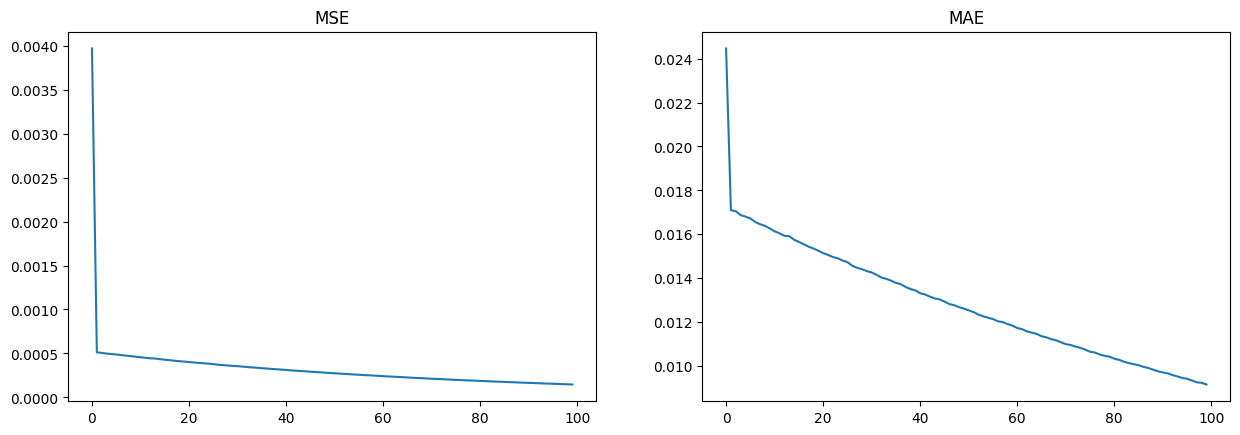

In [16]:
epochs = 100
time_start = time.time()
hist = predictor.fit(
    X,
    y, 
    epochs=epochs,
    verbose=0,
    shuffle=True
    )
time_finish = time.time()
mse_loss, mae_loss = predictor.evaluate(X, y, verbose=0)

print(f'Fit time: {(time_finish - time_start):.{2}f}s')
print(f'Result MSE: {mse_loss}')
print(f'Result MAE: {mae_loss}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])

Получаем предсказания модели

In [17]:
my_ans = predictor.predict(X).flatten()

157/157 [==============================] - 0s 625us/step


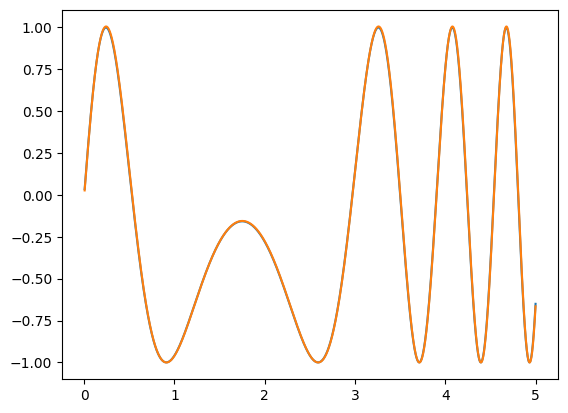

In [9]:
plt.plot(ans_x[D:], y)
plt.plot(ans_x[D:], my_ans)

Находим абсолютное отклонение

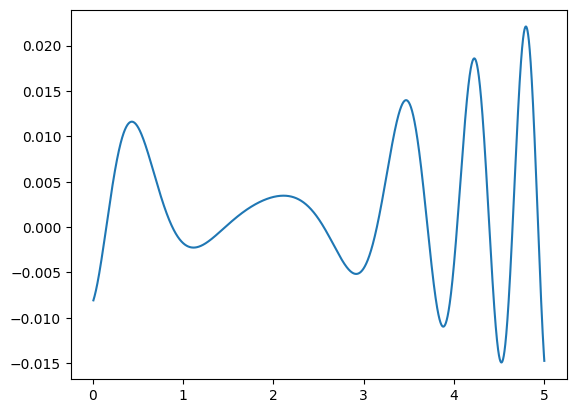

In [10]:
errors = my_ans - y
plt.plot(ans_x[D:], errors)

### Зашумленный сигнал в чистый

In [19]:
def noized(t):
    return np.sin(2.5*t**2 - 5*t)

def resl_sig(t):
    return np.sin(2.5*t**2 - 5*t + 4*np.pi)/3

In [20]:
h = 0.01
t = (0, 2.2)
D = 4

In [21]:
x_points = np.arange(t[0], t[1] + h, h)
noized_points = noized(x_points)
real_points = resl_sig(x_points)

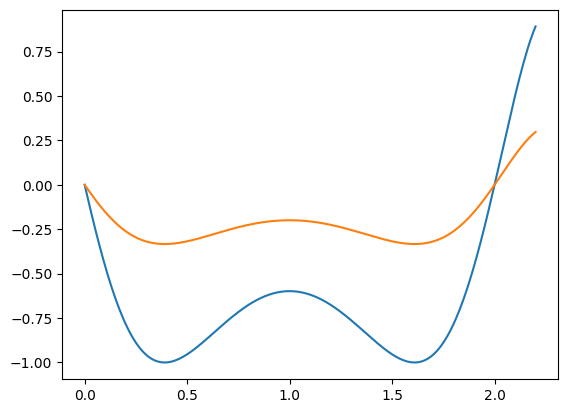

In [22]:
plt.plot(x_points, noized_points)
plt.plot(x_points, real_points)

Готовим датасет

In [23]:
X = [noized_points[i:i+D].tolist() for i in range(0, len(noized_points) - D)]
y = [real_points[i] for i in range(D, len(real_points))]

Создаем модель

In [50]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
predictor.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pred (Dense)                (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Компилируем модель

In [51]:
opt = keras.optimizers.SGD(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

Тренеруем модель

Fit time: 4.24s
Result MSE: 7.184427522588521e-05
Result MAE: 0.005919293500483036


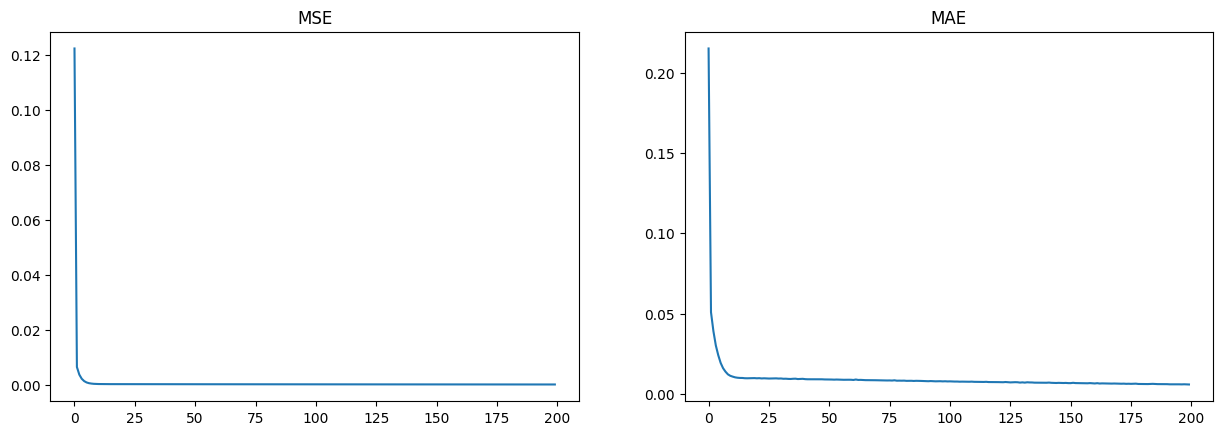

In [52]:
epochs = 200
time_start = time.time()
hist = predictor.fit(
    X,
    y, 
    epochs=epochs,
    verbose=0,
    shuffle=True
    )
time_finish = time.time()
mse_loss, mae_loss = predictor.evaluate(X, y, verbose=0)

print(f'Fit time: {(time_finish - time_start):.{2}f}s')
print(f'Result MSE: {mse_loss}')
print(f'Result MAE: {mae_loss}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])

Рисуем сигнал

In [53]:
my_denoized = predictor.predict(X).flatten()

7/7 [==============================] - 0s 809us/step


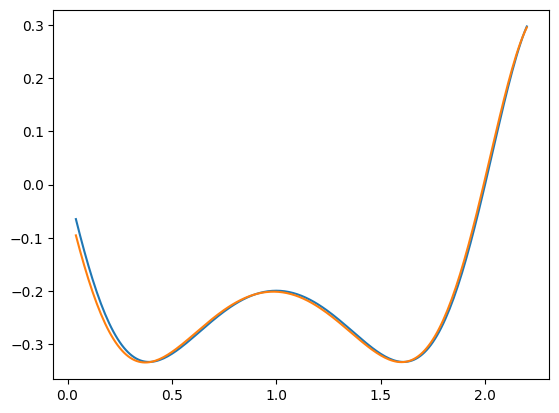

In [54]:
plt.plot(x_points[D:], y)
plt.plot(x_points[D:], my_denoized)

Находим абсолютное отконение

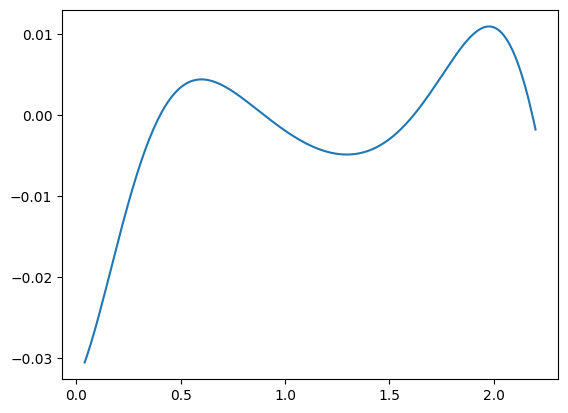

In [55]:
errors = my_denoized - y
plt.plot(x_points[D:], errors)